In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# drop unnecssary last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Renameing columns v1 and v2
df.rename(columns={'v1':'Target', 'v2':'SMS'}, inplace = True)

In [6]:
df.isnull().sum()

Target    0
SMS       0
dtype: int64

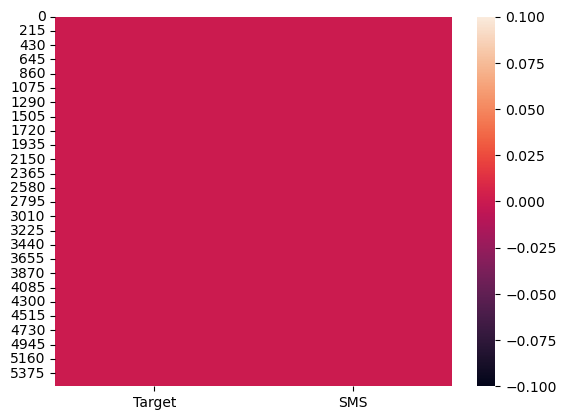

In [7]:
sns.heatmap(df.isnull());

In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep = 'first', inplace =True)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud

In [14]:
df['No_of_characters'] = df['SMS'].apply(len)

In [15]:
df['No_of_word'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df['No_of_sentences'] = df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,Target,SMS,No_of_characters,No_of_word,No_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


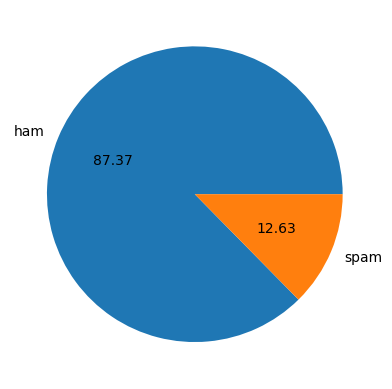

0    4516
1     653
Name: Target, dtype: int64

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
df['Target'].value_counts()

In [19]:
df[['No_of_characters','No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
# ham
df[df['Target'] == 0][['No_of_characters','No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
#spam
df[df['Target'] == 1][['No_of_characters','No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


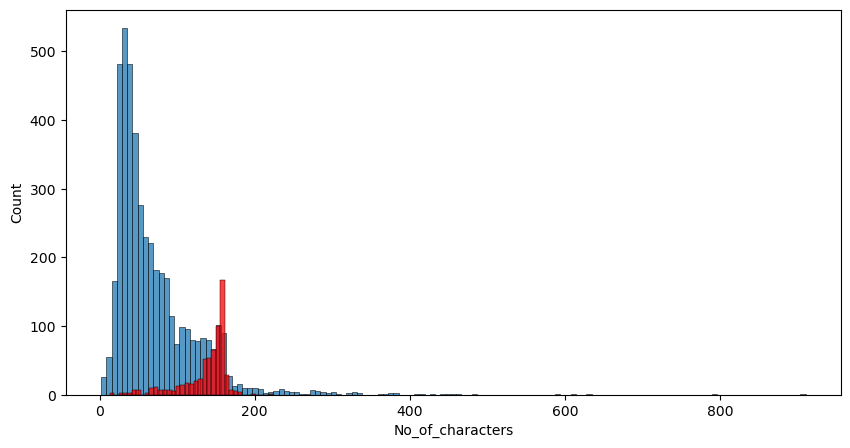

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['No_of_characters'])
sns.histplot(df[df['Target'] == 1]['No_of_characters'],color='red')
plt.show()

### Comment :
#### 1- Number of character in Spam sms is comparetively much high than Ham sms.
#### 2- On average each ham sms contain 71 character, 17 words and 2 sentences.

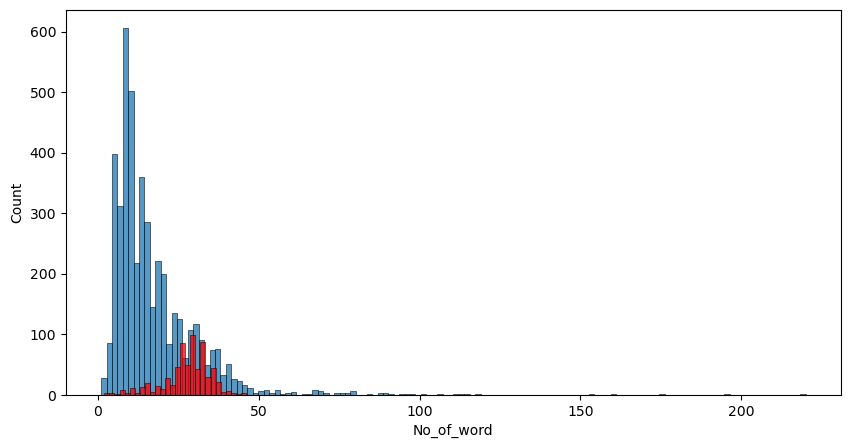

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['No_of_word'])
sns.histplot(df[df['Target'] == 1]['No_of_word'],color='red');

### Comment :
#### 1- Number of Word in Spam sms is comparetively much high than Hum sms.
#### 2- On average each spam sms contain 138 character, 27 words and 3 sentences.

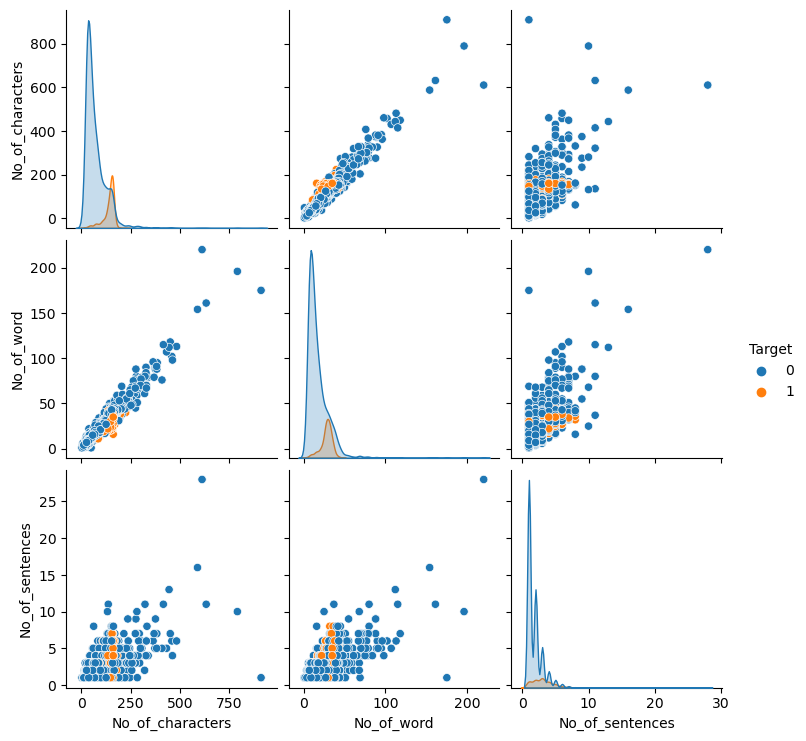

In [24]:
sns.pairplot(df,hue='Target');

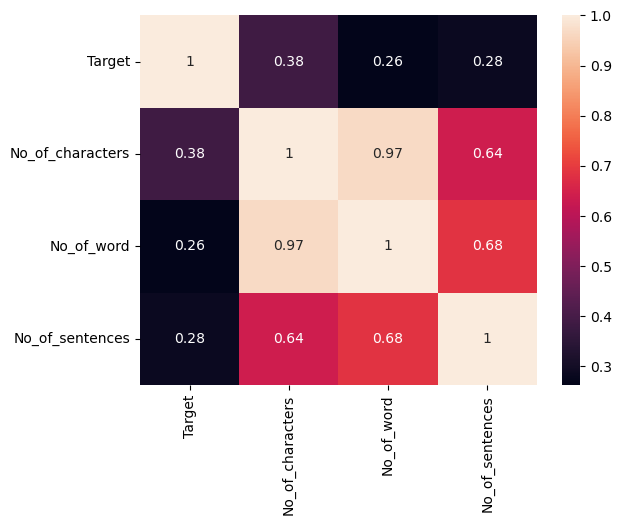

In [25]:
sns.heatmap(df.corr(),annot=True);

### Text Mining

In [26]:
from nltk.corpus import stopwords
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [27]:
#Calling the class
clean_text(df, 'SMS')
df['SMS'].head()

0    go jurong point crazy available bugis n great ...
1                                ok lar joking wif oni
2    free entry numbr wkly comp win fa cup final tk...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: SMS, dtype: object

## Word Cloud
#### 1- Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.
#### 2- The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.
#### 3- The enlarged texts are the most number of words used there and small texts are the less number of words used.

### Word Cloud of Ham SMS

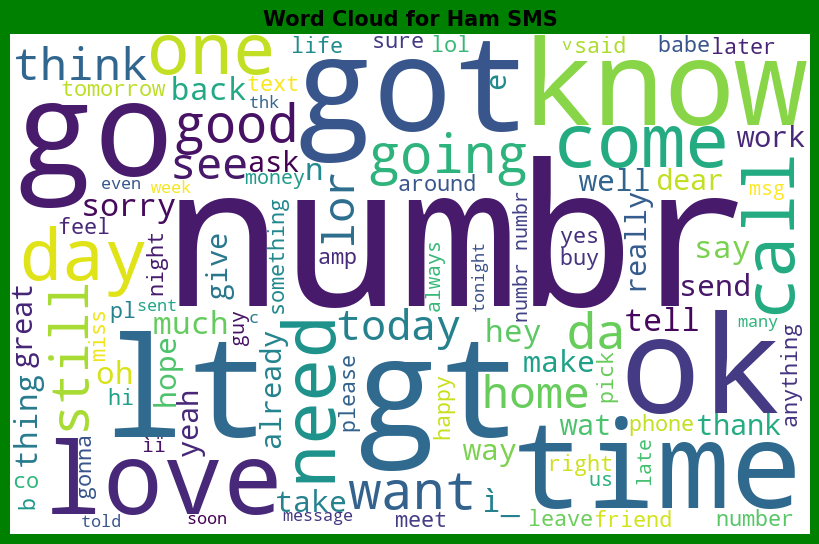

In [35]:
# Word cloud of ham SMS
zero = df['SMS'][df['Target'] == 0]
zero_cloud = wordcloud.WordCloud(width = 800, height = 500, background_color = 'white', max_words = 100).generate(' '.join(zero))
plt.figure(figsize = (8,8), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Ham SMS', fontsize= 15, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### Word Cloud of SMS

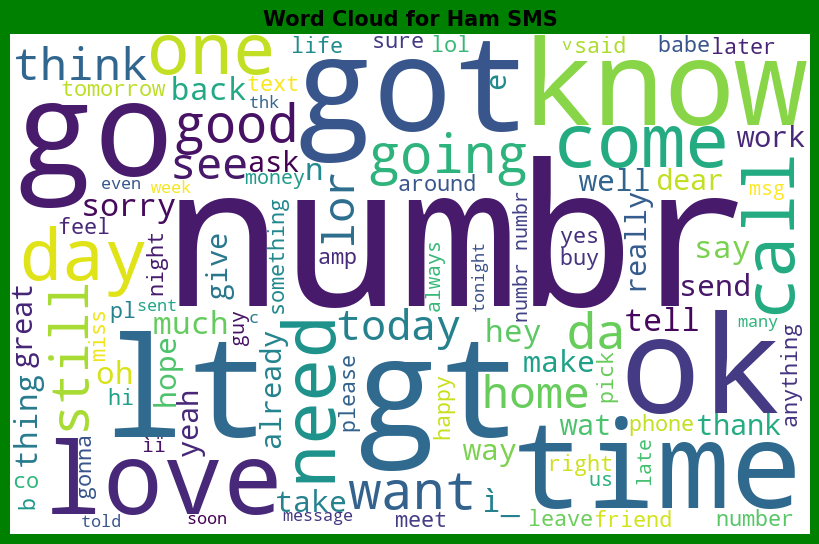

In [37]:
# word cloud of SMS
one = df['SMS'][df['Target'] == 1]
one_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(''.join(zero))
plt.figure(figsize =(8,8), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Ham SMS', fontsize = 15, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### Top 20 Ham Word in SMS Corpus

In [30]:
ham_corpus = []
for i in df[df['Target'] == 0]['SMS'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [31]:
len(ham_corpus)

35163

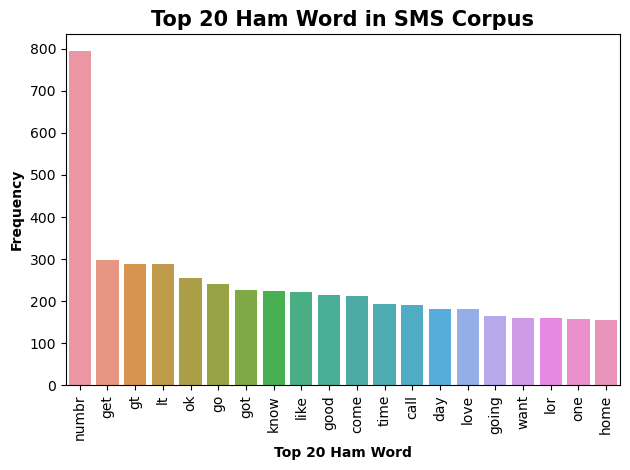

In [32]:
from collections import Counter
count= sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
count.set_xlabel("Top 20 Ham Word", fontsize=10, fontweight = 'bold')
count.set_ylabel("Frequency", fontsize=10, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize=15, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

### Top 20 Spam Word in SMS Corpus

In [33]:
spam_corpus = []
for i in df[df['Target'] == 1]['SMS'].tolist():
    for word in i.split():
        spam_corpus.append(word)

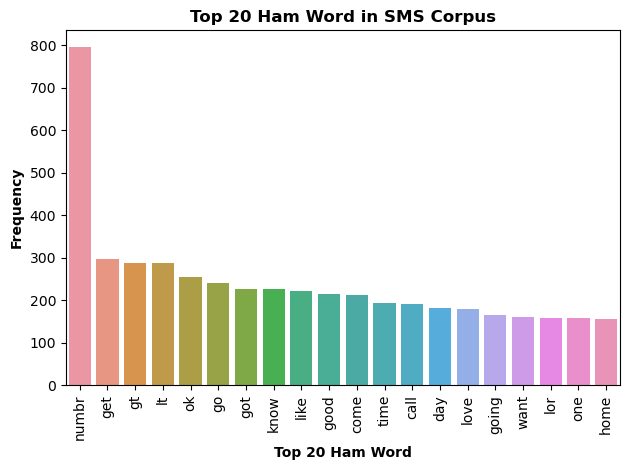

In [34]:
from collections import Counter
count = sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
count.set_xlabel('Top 20 Ham Word',fontsize = 10 ,fontweight = 'bold')
count.set_ylabel('Frequency',fontsize = 10, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

### Text Vectorization to convert text into numeric

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
fertures = tf.fit_transform(df['SMS'])
X=fertures
Y=df[['Target']]

### Finding the best random state

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(X_train,Y_train)
    predRF = RF.predict(X_test)
    acc = accuracy_score(Y_test,predRF)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.988394584139265 on Random_state 195


### Train Test Split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : 0.7436475142447045
Mean Absolute Error(MAE) 0.024500322372662798
Mean Squared Error 0.024500322372662798
Root Mean Squared Error 0.1565257882032951
-----------------------------------------------------
0.9754996776273372
-----------------------------------------------------
[[1380    5]
 [  33  133]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1385
           1       0.96      0.80      0.88       166

    accuracy                           0.98      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.98      0.98      0.97      1551



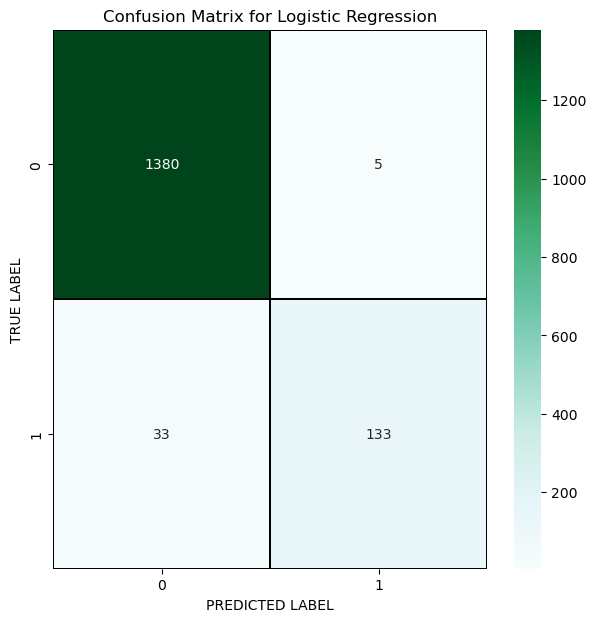

In [40]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Logistic Regression');

### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.8853159932147362
Mean Absolute Error 0.01096067053513862
Mean Squared Error 0.01096067053513862
Root Mean Squared Error 0.10469322105627765
-----------------------------------------------------
Accuracy Score:  0.9890393294648614
-----------------------------------------------------
Confusion Matrix:
 [[1385    0]
 [  17  149]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1385
           1       1.00      0.90      0.95       166

    accuracy                           0.99      1551
   macro avg       0.99      0.95      0.97      1551
weighted avg       0.99      0.99      0.99      1551



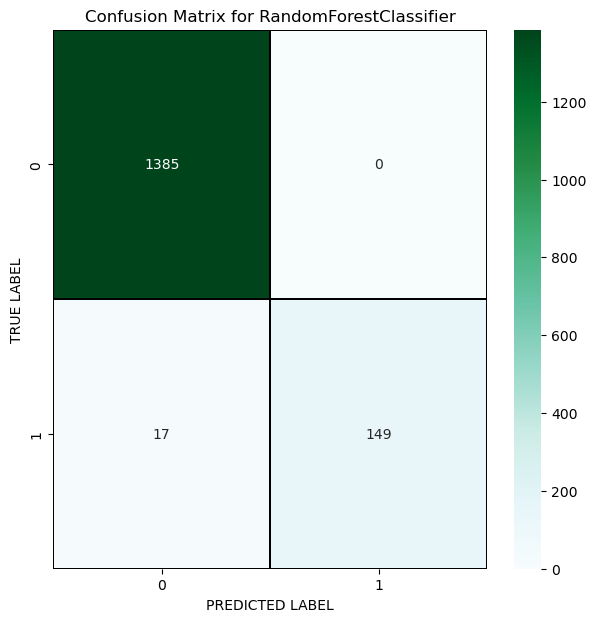

In [42]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### MultinomialNB Classifier

In [43]:
from sklearn.naive_bayes import MultinomialNB

# Checking accuracy for MultinomialNB Classifier
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

# [Prediction]
predMNB = MNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predMNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predMNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predMNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predMNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predMNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predMNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predMNB))

R2 Score: 0.8448392849375843
Mean Absolute Error 0.014829142488716958
Mean Squared Error 0.014829142488716958
Root Mean Squared Error 0.12177496659296178
-----------------------------------------------------
Accuracy Score:  0.9851708575112831
-----------------------------------------------------
Confusion Matrix:
 [[1385    0]
 [  23  143]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1385
           1       1.00      0.86      0.93       166

    accuracy                           0.99      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.99      0.99      0.98      1551



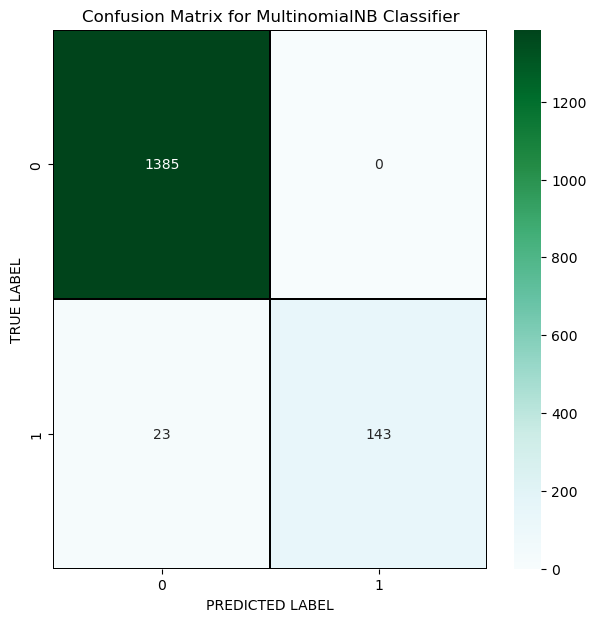

In [44]:
cm = confusion_matrix(Y_test,predMNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for MultinomialNB Classifier')
plt.show()

### BernoulliNB

In [45]:
from sklearn.naive_bayes import BernoulliNB

# Checking accuracy for BernoulliNB Classifier
BNB = BernoulliNB()
BNB.fit(X_train,Y_train)

# [Prediction]
predBNB = BNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predBNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predBNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predBNB))

R2 Score: 0.8583315210299682
Mean Absolute Error 0.013539651837524178
Mean Squared Error 0.013539651837524178
Root Mean Squared Error 0.11636000961466177
-----------------------------------------------------
Accuracy Score:  0.9864603481624759
-----------------------------------------------------
Confusion Matrix:
 [[1379    6]
 [  15  151]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1385
           1       0.96      0.91      0.93       166

    accuracy                           0.99      1551
   macro avg       0.98      0.95      0.96      1551
weighted avg       0.99      0.99      0.99      1551



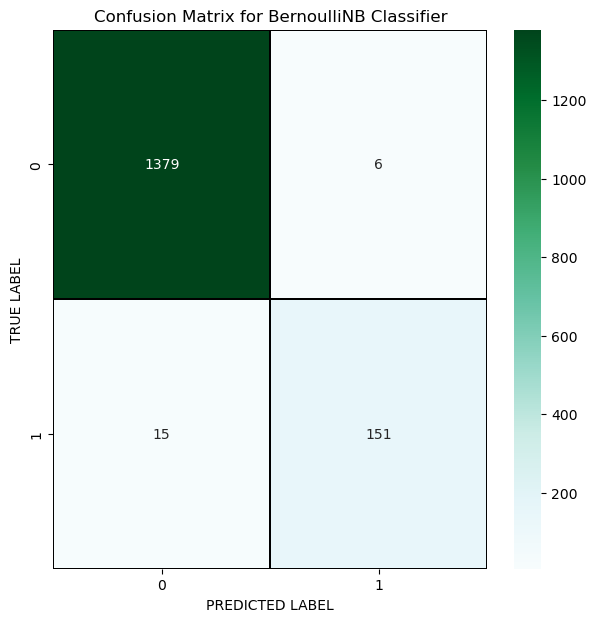

In [49]:
cm = confusion_matrix(Y_test,predBNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BernoulliNB Classifier')
plt.show()

### Extra Trees Classifier

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Support Vector Machine Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.8583315210299682
Mean Absolute Error 0.013539651837524178
Mean Squared Error 0.013539651837524178
Root Mean Squared Error 0.11636000961466177
-----------------------------------------------------
Accuracy Score:  0.9864603481624759
-----------------------------------------------------
Confusion Matrix:
 [[1382    3]
 [  18  148]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1385
           1       0.98      0.89      0.93       166

    accuracy                           0.99      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.99      0.99      0.99      1551



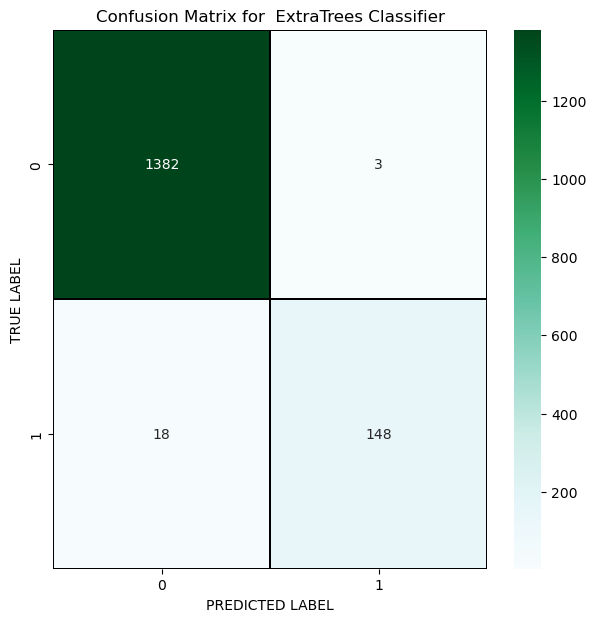

In [48]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

### AdaBoostClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.8111086947066244
Mean Absolute Error 0.018052869116698903
Mean Squared Error 0.018052869116698903
Root Mean Squared Error 0.13436096574786482
-----------------------------------------------------
Accuracy Score:  0.9819471308833011
-----------------------------------------------------
Confusion Matrix:
 [[1378    7]
 [  21  145]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1385
           1       0.95      0.87      0.91       166

    accuracy                           0.98      1551
   macro avg       0.97      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



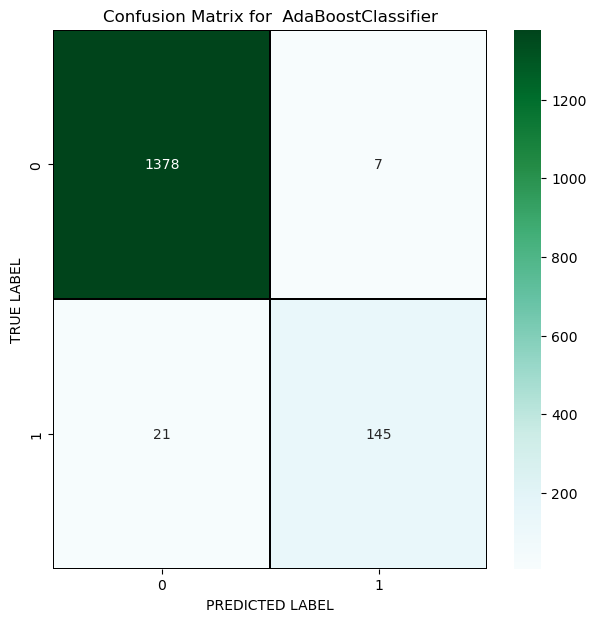

In [51]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

### Support Vector Machine Classifier

In [52]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.8650776390761603
Mean Absolute Error 0.012894906511927788
Mean Squared Error 0.012894906511927788
Root Mean Squared Error 0.11355574187124043
-----------------------------------------------------
Accuracy Score:  0.9871050934880722
-----------------------------------------------------
Confusion Matrix:
 [[1385    0]
 [  20  146]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1385
           1       1.00      0.88      0.94       166

    accuracy                           0.99      1551
   macro avg       0.99      0.94      0.96      1551
weighted avg       0.99      0.99      0.99      1551



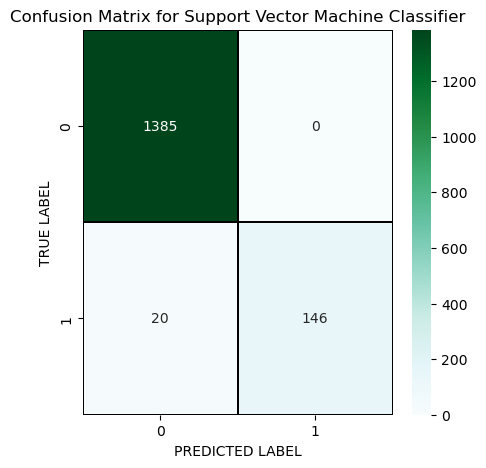

In [54]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Cross Validation Score

In [55]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('BernoulliNB Classifier:',cross_val_score(BNB,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(ETC,X,Y,cv=5).mean())

# cv score for Naive Bias Classifier
print('MultinomialNB Classifier:',cross_val_score(MNB,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())

Logistic Regression 0.968466336242489
Random Forest Classifier 0.9820080477698241
BernoulliNB Classifier: 0.9854898597725728
Support Vector  Classifier 0.982589254785502
Extra Trees Classifier: 0.9814272152432025
MultinomialNB Classifier: 0.9798800137062994
AdaBoosting Classifier: 0.9754310837151563


In [60]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(BNB,open('model.pkl','wb'))